C:\Users\lucka\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=4096 is too large for input signal of length=2583
  warnings.warn(


151


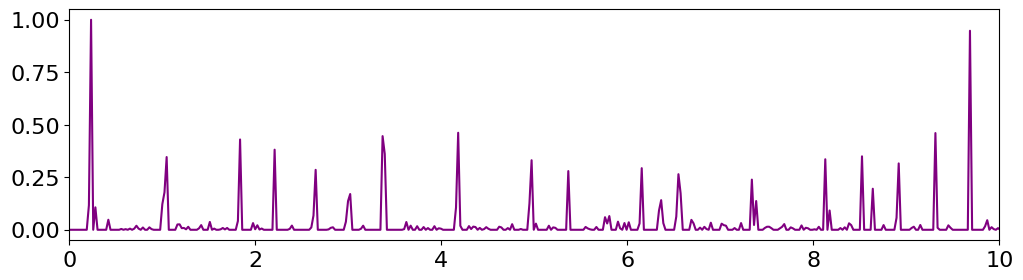

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import librosa.display
from RhythmRecognition.constants import *
import matplotlib as mpl
from RhythmRecognition.onset import spectral
from RhythmRecognition.tempo import hybrid

mpl.rcParams.update({'font.size': 16})

audiofile = "../audio_files/valhallacalling.wav"
duration = 60  # how many seconds of the file will be processed

spectral_novelty = spectral.SpectralNovelty(audiofile, duration=60)
spectral_novelty = spectral_novelty.get()

frames = np.arange(len(spectral_novelty))
t = librosa.frames_to_time(frames, sr=SAMPLING_RATE, hop_length=HOP_LENGTH)

hybrid_tempogram = hybrid.HybridTempogram(spectral_novelty)
tempo = hybrid_tempogram.get_tempo()
print(tempo)

plt.figure(figsize=(12, 3))
plt.plot(t, spectral_novelty, 'purple')
plt.xlim(0, 10)
plt.show()